In [1]:
import numpy as np
import pandas as pd

import pymatreader as reader
import matplotlib.pyplot as plt

In [2]:
import scipy.stats

In [3]:
data = reader.read_mat('P5c.mat')

In [4]:
X, y = data['X'], data['y01']

# probit regression using EM : 


we will implement 4 methods : 

1) init_beta_zero(m, n) : gives us a starting array of random numbers for the weights 

2) return_phi_func(x, beta) : returns the value of the cdf of stand. normal (N(0,1)) at beta.T * X

3) E_STEP(x, y, beta) : takes in the old vector beta and then computes the matrix z according to the relation in the figure below.

4) M_STEP(x, z) : returns the updated set of weights using the matrices X and Z.

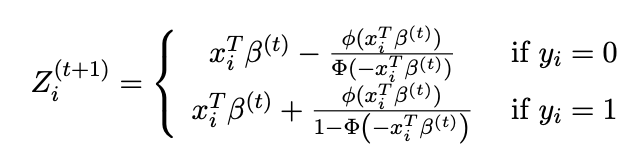

In [5]:
from IPython import display
display.Image("fig1.png")

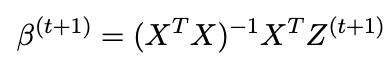

In [6]:
from IPython import display
display.Image("fig2.png")

In [7]:
def init_beta_zero(m,n):
    
    return np.random.rand(m,n)

def return_phi_func(x, beta):
    
    return scipy.stats.norm.cdf(beta.T @ x)

def E_STEP(x, y, beta):
    
    Z = np.zeros(X.shape[0])
    
    for i in range(Z.shape[0]):
        
        if  y[i] == 0 :
            
            Z[i] = (beta.T @ X[i, :]) - (return_phi_func(X[i, :], beta)/(return_phi_func(-X[i, :], beta) + 0.00000000001)) 
        else: 
            
            Z[i] = (beta.T @ X[i, :]) + (return_phi_func(X[i, :], beta)/(1 - return_phi_func(-X[i, :], beta) + 0.000000000001))
            
    return Z

def M_STEP(X, Z): 
    
    beta_new = np.linalg.inv((X.T @ X)) @ X.T @ Z 
    
    return beta_new

In [8]:
b_0 = init_beta_zero(X.shape[1], 1)

max_iter = 1000

b_t0 = b_0

for i in range(max_iter):
    
    
    Z_t1 = E_STEP(X, y, b_t0)
    
    b_t1 = M_STEP(X, Z_t1)
    
    b_t0 = b_t1

In [9]:
b_0

array([[0.87363352],
       [0.1771205 ]])

In [10]:
b_t0

array([ 381.2585799 , -362.20343281])

In [11]:
y_hat = (b_t0 @ X.T)

In [12]:
y_hat = scipy.stats.norm.cdf(y_hat)

In [13]:
out = []

for i in y_hat : 
    out.append(int(i))
    

In [14]:
out

[1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1]

the above is the predicted classification output for the given dataset, kindly mark it accordingly.